In [1]:
from polpymer.core_funcs import Polymer, Monomer, Dish
from polpymer.data_funcs import plot_polymer, grow_polymer, \
     generate_N_polymers, expect_observ, error_observ
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" We can start a new Polymer object with a starting Monomer(angle) where angle is {0,1,2,3} for 0*90, 1*90, 2*90, 3*90 degrees

Here we start the chain with a monomer to the right
"""
first_monomer = Monomer(0)

polymer = Polymer((10,10), (5,5))
print(first_monomer.end_location)

None


In [3]:
print(polymer.chain_end)
print(polymer.chain_start)

(4, 5)
(5, 5)


In [4]:
polymer.add_monomer(3) # add monomer down
print(polymer.chain_end)

(4, 4)


In [5]:
"""
Since we dont want our Polymer to close we see that we get an arrow if we now
add further monomers that go to the left and up again
"""

polymer.add_monomer(2) # add monomer to the left
print(polymer.chain_end)
try:
    polymer.add_monomer(1) # add monomer up (should error out)
except:
    print('Could not add monomer')
print(polymer.chain_end)

(3, 4)
(3, 5)


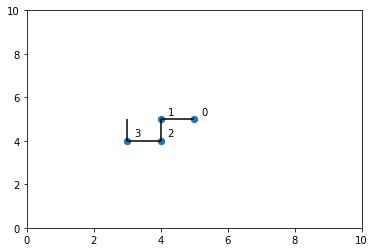

In [6]:
plot_polymer(polymer)

In [7]:
for monomer in polymer:
    print(monomer, "angle = {}".format(monomer.angle))

Monomer from (5, 5) to (4, 5) angle = 2
Monomer from (4, 5) to (4, 4) angle = 3
Monomer from (4, 4) to (3, 4) angle = 2
Monomer from (3, 4) to (3, 5) angle = 1


In [8]:
polymer1 = Polymer((10,10), (5,5))

In [9]:
from random import randint

random_angles = [randint(0,3) for i in range(10)]

for i in random_angles:
    polymer1.add_monomer(i)

Exception: Proposed monomer's end location already a node of polymer

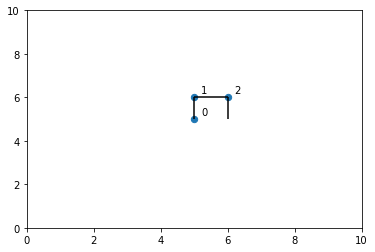

In [10]:
plot_polymer(polymer1)

In [11]:
m, polymer2 = grow_polymer((20,20), (10,10), 200)
m

The polymer grew to length 69


array([3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 3., 1., 3., 2., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3.,
       3., 2., 3., 3., 2., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2.,
       3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

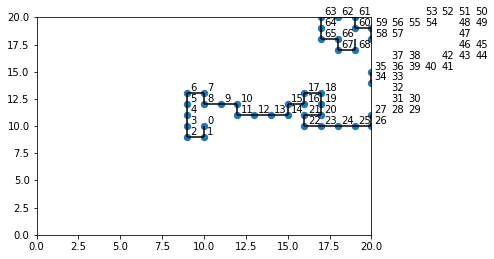

In [12]:
plot_polymer(polymer2)

In [13]:
polymer2.chain_length

69

In [14]:
"""
run test to check if behaviour is as expected for random polymers of length 1, 2, 3
"""
N = 1000
L = 2
end2end = np.zeros(N)
for i in range(N):
    test_m, testpoly = grow_polymer((10,10), (5,5), L)
    end2end[i] = np.sqrt(testpoly.distance_end_start())

plt.hist(end2end)
plt.savefig('Figures/end2endDistribution_L={}'.format(L))

"Distribution of end to end distances is as expected for these lengths"

AttributeError: 'Polymer' object has no attribute 'distance_end_start'

In [15]:
end_to_end, gyration, weights = generate_N_polymers(70, 10, (10,10), (5,5))
end_to_end_weighted_avg = expect_observ(end_to_end, weights)
end_to_end_err = error_observ(end_to_end, weights, 5)

The polymer grew to length 7


In [16]:
polymer = Polymer((10,10), (5,5))
polymer.grow_polymer(40)

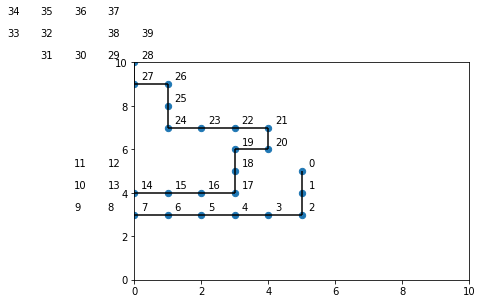

In [17]:
plot_polymer(polymer)

In [18]:
end, gyr = polymer.observables()

In [19]:
print(end)
print(gyr)

[  1.   4.   5.   8.  13.  20.  29.  40.  53.  50.  49.  36.  37.  26.
  17.  10.   5.   4.   5.   2.   5.   8.  13.  20.  25.  32.  41.  50.
  61.  74.  89. 100. 117. 130. 113.  98.  85.  72.  61.]
[ 0.          0.25        0.66666667  0.875       1.28        1.91666667
  2.7755102   3.84375     5.11111111  6.57        7.47107438  8.16666667
  8.14201183  7.92346939  7.48444444  7.0234375   6.66435986  6.4845679
  6.38227147  6.43        6.63038549  6.98553719  7.10018904  7.10763889
  7.1072      7.3091716   7.739369    8.16836735  8.82520809  9.50777778
 10.26847034 11.1484375  12.19467401 13.36072664 14.68734694 15.61728395
 16.26004383 16.70706371 16.83892176]


In [20]:
dish = Dish((10,10), (5,5))


In [23]:
dish.find_N_polymer(100, 30)

In [24]:
dish.polymers

In [25]:
weights = dish.weights
observ = dish.end_to_end


In [26]:

end_to_end_weighted_avg = expect_observ(observ, weights)
end_to_end_err = error_observ(observ, weights, 5)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'NoneType'

In [27]:
def scaling_law(L, dims):
    ls = np.arange(L)+1
    exponent = 2*3/4

    return ls**exponent

In [28]:
exp_behaviour = scaling_law(30, 2)

ValueError: 'x' and 'y' must have the same size

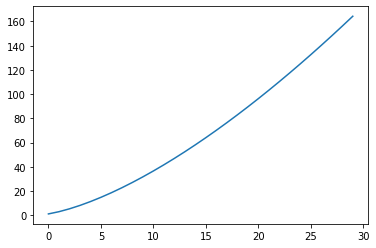

In [29]:
plt.plot(np.arange(30),exp_behaviour, label=r'exp.')
plt.errorbar(np.arange(29), end_to_end_weighted_avg, yerr=end_to_end_err, label=r'sim.')
plt.legend(frameon=False)
plt.ylabel(r"$\langle r_e^2(L) \rangle$")
plt.xlabel(r"Polymer length $L$ [$a$]")
plt.savefig('Figures/end2endplot')

In [43]:
dish = Dish((10,10),(5,5))
dish.PERM(10, 2, 100)
print(len(dish.polymers))

75


In [44]:
for polymer in dish.polymers:
    print(polymer.chain_length)

22
23
27
18
21
27
39
25
27
29
25
25
25
64
49
66
95
63
86
23
42
40
56
34
39
83
100
52
44
60
100
72
50
100
72
69
47
59
59
96
60
84
91
91
84
82
100
72
100
81
95
100
98
100
100
93
95
100
100
92
100
100
100
94
100
100
100
100
100
100
100
100
100
100
100


In [45]:
weights = dish.weights
observ = dish.end_to_end

In [46]:
end_to_end_weighted_avg = expect_observ(observ, weights)
end_to_end_err = error_observ(observ, weights, 5)

In [47]:
from scipy.optimize import curve_fit as cv

In [48]:
def fun(x, a):
    return a*x**(3/2)

In [49]:
cutoff = 70
cf = cutoff

In [50]:
x = np.arange(cf)
y = end_to_end_weighted_avg[0:cf]

In [51]:
[ i for i in np.arange(len(end_to_end_weighted_avg)) if np.isnan(end_to_end_weighted_avg[i])]

[]

In [52]:
copt, ccov = cv(fun, x, y)

In [53]:

exp_behaviour = fun(x, copt) 

In [54]:
yerr = end_to_end_err[0:cf]

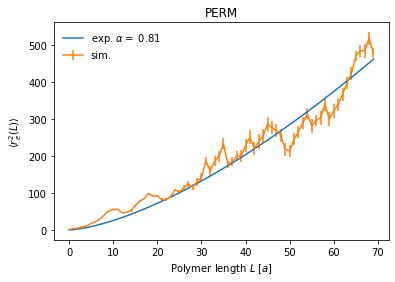

In [56]:
plt.plot(x, fun(x, copt), label=r'exp. $\alpha=$ '+'{:.2f}'.format(copt[0]))
plt.errorbar(x, end_to_end_weighted_avg[0:cf], yerr=end_to_end_err[0:cf], label=r'sim.')
plt.legend(frameon=False)
plt.ylabel(r"$\langle r_e^2(L) \rangle$")
plt.xlabel(r"Polymer length $L$ [$a$]")
plt.title("PERM")
plt.savefig('Figures/end2endplotperm')

In [ ]:
dish = Dish((10,10),(5,5))

In [ ]:
dish.find_N_polymer(100, 30)

In [ ]:
len(dish.polymers)

129

In [ ]:
dish.analyse_polymers(30)

(array([[  1.,   4.,   9., ..., 305., 314., 325.],
        [  1.,   2.,   1., ...,  37.,  40.,  29.],
        [  1.,   2.,   5., ..., 137., 146., 169.],
        ...,
        [  1.,   2.,   5., ...,   0.,   0.,   0.],
        [  1.,   2.,   1., ..., 121., 122., 125.],
        [  1.,   2.,   1., ...,  25.,  34.,  45.]]),
 array([[ 0.        ,  0.25      ,  0.66666667, ..., 22.32647462,
         23.84438776, 25.31034483],
        [ 0.        ,  0.25      ,  0.44444444, ...,  9.21262003,
          9.84693878, 10.61117717],
        [ 0.        ,  0.25      ,  0.44444444, ..., 13.22085048,
         13.70153061, 14.28775268],
        ...,
        [ 0.        ,  0.25      ,  0.44444444, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.25      ,  0.44444444, ..., 11.53635117,
         12.23469388, 12.79667063],
        [ 0.        ,  0.25      ,  0.44444444, ...,  8.28532236,
          8.11734694,  8.10939358]]),
 array([[4.00000000e+00, 1.20000000e+01, 3.60000000e

30